In [3]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit

In [4]:
# Get ready
home = "/home/pbarletta/labo/20/cph_obp/"
dir_apo_pdt = string(home, "run/apo/pdt/")
dir_apo_all_pdt = string(home, "run/apo/all_pdt/")

nstlim = 12000
phs = [ 2.0 ; 2.5 ; 3.0 ; 3.5 ; 4.0 ; 4.5 ; 5.0 ; 5.5 ; 6.0 ; 6.5 ; 7.0 ; 7.5 ]
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

21

In [8]:
for i in 1:12
    global rmsd_apo_idx = readdlm(joinpath(dir_apo_pdt, string(phs[i]),
            string("rmsd_apo_", idx[i])))[2:end, 2]
    global rmsd_apo_ph = readdlm(joinpath(dir_apo_all_pdt, string(phs[i]),
            string("rmsd_apo_", phs[i])))[2:end, 2]

    sym_rmsd_apo_idx = Symbol("rmsd_apo_", idx[i])
    sym_rmsd_apo_ph = Symbol("rmsd_apo_", convert(Int64, phs[i] * 10))
    eval(:($sym_rmsd_apo_idx = rmsd_apo_idx))
    eval(:($sym_rmsd_apo_ph = rmsd_apo_ph))
end

## RMSD por pH

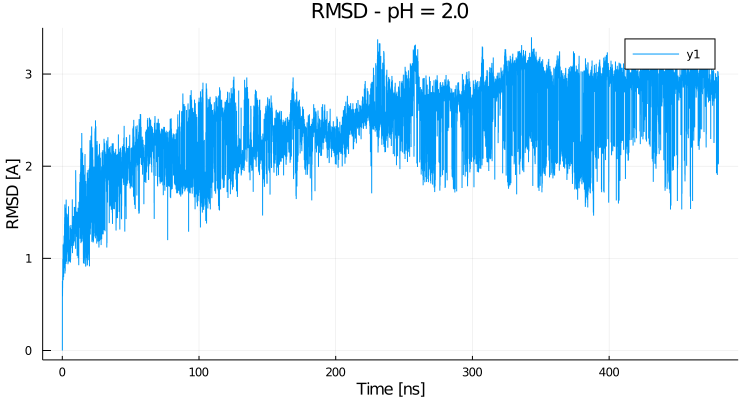

In [6]:
plot(collect(1:nstlim) ./ 25, rmsd_apo_20,
    title = string("RMSD - pH = ", 2.0), size = (750, 400),
    yaxis = "RMSD [A]", xaxis = "Time [ns]")

## RMSD por idx

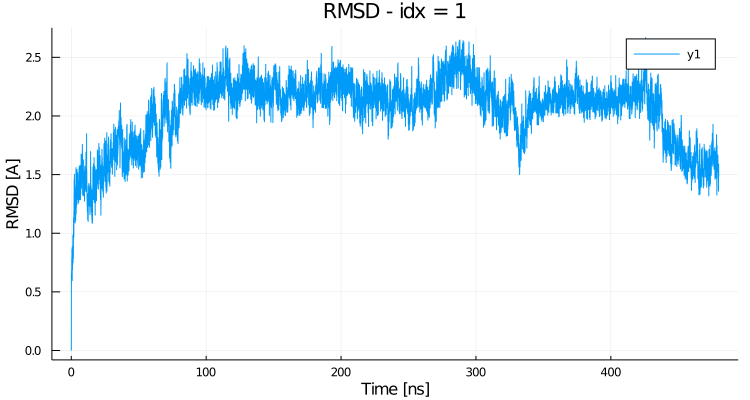

In [7]:
plot(collect(1:nstlim) ./ 25, rmsd_apo_1,
    title = string("RMSD - idx = ", 1), size = (750, 400),
    yaxis = "RMSD [A]", xaxis = "Time [ns]")